In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Part 1: Inroduce the data and the purpose ###

 The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe to a term deposit (variable y).


Source: 

https://archive.ics.uci.edu/ml/datasets/bank+marketing


Additonal machine learning study: 

http://www.columbia.edu/~jc4133/ADA-Project.pdf


The purpose of this project is to determine parameter that migh affect the y varaible.  Based on the columbia paper, the duration variable will be the main focus in that we will look at how changes in duration affect the final outcome.  

For this analysis, we will filter the data in the following ways:
1) Use first time calls in order to elimatinat past the infulences of past calls
2) Only use duration over the mean duration (257 s), assuming that this period of time is the most variable since it is more likely to go beyond scripted conversation.
3) Campaigns that included more than 30 records in order to reduce the bias of the data.  Campaigns with fewer callers could be influenced by other factors. 


### Part 2: EDA ###



In [2]:
#Upload Data
#df = pd.read_csv("bank//bank.csv",delimiter=";")
df = pd.read_csv("bank//bank-additional.csv",delimiter=";")
#df= df_add

#df.shape,df_add.shape

In [3]:
#Sample of the data
pd.set_option('display.max_columns', None)
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [4]:
#Dataframe dimensions
df.shape
#4521 records (random data sampled from larger dataset)
#17 columns

(4119, 21)

In [6]:
#Datatype of all fields
df.info()
# data type object mainly represents categorical features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [7]:
# Statistics for numeric features
df.describe()

#Average age is 40
#Average duration is around 4 minutes (257 s)
#Over 75% of the calls by a campagin for a given person was 3
#Min pday of 0 means that someone was called back on the same day since 999 represents first time calls


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [8]:
#Check for missing values
df.isna().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

### Part 3: Data Cleaning/ Filtering / Transformation 

1) Find conversations that last more than average

2) Only focus on first time call success

3) Create categories by age

In [9]:
#Create a mask to filter data rows
#set the duration to values greater than mean and to those individuals who were never contacted 
mask = (df.duration > df.duration.mean()) & (df.pdays == 999)



In [10]:
#Divide age (range = 70) into 7 groups
#df.describe()["age"]
df["age_label"] = (df.age.values -18) // 10
#df[["age","age_label"]].head(20)

1) Split data into records with yes target vs the total records

2) Look though all the columns of interest and print out the difference in percentage counts for each label.

    a. Percentages are calculated in order to normalize percent comparison

    b. Positive values =  higher portion of group signifies "yes" outcome 





In [11]:

#df_success = df_add[df_add.campaign.isin(successful_camapigns) & mask]
df_success = df[(df.y == "yes") & mask]
df_control = df[mask]

cols = ["day_of_week","job","marital","loan","education","month","age_label"]
#ToDo: group by age
for c in cols:

    ctrl = df_control[c].value_counts(normalize=True).sort_values().to_frame()*100
    succ = df_success[c].value_counts(normalize=True).sort_values().to_frame()*100
    print()
    display(succ-ctrl)



,day_of_week
fri,-0.916284
mon,2.285012
thu,-2.806380
tue,-1.983475
wed,3.421126


,job
admin.,4.289053
blue-collar,-5.867051
entrepreneur,-0.422152
housemaid,0.140625
management,-1.738911
retired,1.956240
self-employed,-0.653099
services,-1.165573
student,1.093593
technician,1.677214


,marital
unknown,-0.023901
divorced,0.105885
single,4.541122
married,-4.623106


,loan
unknown,-0.658379
yes,1.050794
no,-0.392415


,education
basic.4y,0.360733
basic.6y,-1.850354
basic.9y,-1.866473
high.school,-0.818180
professional.course,0.169528
university.degree,3.853561
unknown,0.151185


,month
apr,2.404793
aug,0.111166
dec,1.189196
jul,-0.964085
jun,4.496377
mar,1.473224
may,-9.981852
nov,-1.733630
oct,1.940398
sep,1.064412


,age_label
0,-0.791222
1,-1.200868
2,-4.887681
3,1.438207
4,3.708212
5,0.467174
6,1.266178


In [12]:

ctrl = df_control["age_label"].value_counts(normalize=True).sort_values().to_frame()*100
succ = df_success["age_label"].value_counts(normalize=True).sort_values().to_frame()*100

ctrl = ctrl.reset_index()
succ = succ.reset_index()
ctrl.columns = ["age_group","ctrl"]
succ.columns = ["age_group","succ"]

df_diff = ctrl.merge(succ, on="age_group")

df_diff["diff"] = df_diff["succ"] - df_diff["ctrl"] 
df_diff["age_max"] = (df_diff["age_group"] + 1) *10 + 18
df_diff["age_min"] = (df_diff["age_group"]) *10 + 18
df_diff.sort_values(by="age_group")




,age_group,ctrl,succ,diff,age_max,age_min
3,0,6.928406,6.137184,-0.791222,28,18
6,1,39.107005,37.906137,-1.200868,38,28
5,2,28.714396,23.826715,-4.887681,48,38
4,3,19.861432,21.299639,1.438207,58,48
2,4,4.234026,7.942238,3.708212,68,58
1,5,0.615858,1.083032,0.467174,78,68
0,6,0.538876,1.805054,1.266178,88,78


First calls made to those under the age of 48 were less successful. This could be because younger people were less available to take a phone call.



In [13]:
#Function to calcualte the difference in percentages
def percent_diff(field):
    ctrl = df_control[field].value_counts(normalize=True).sort_values().to_frame()*100
    succ = df_success[field].value_counts(normalize=True).sort_values().to_frame()*100

    ctrl = ctrl.reset_index()
    succ = succ.reset_index()
    ctrl.columns = [field,"ctrl"]
    succ.columns = [field,"succ"]

    df_diff = ctrl.merge(succ, on=field)
    df_diff["diff"] = df_diff["succ"] - df_diff["ctrl"] 
    return df_diff

percent_diff("contact")

,contact,ctrl,succ,diff
0,telephone,34.795997,22.021661,-12.774336
1,cellular,65.204003,77.978339,12.774336


Cellular outcomes were much better than telephone

In [14]:
percent_diff("month")

,month,ctrl,succ,diff
0,dec,0.615858,1.805054,1.189196
1,mar,0.692841,2.166065,1.473224
2,oct,1.308699,3.249097,1.940398
3,sep,1.462664,2.527076,1.064412
4,apr,6.620477,9.025271,2.404793
5,nov,9.314858,7.581227,-1.733630
6,aug,12.163202,12.274368,0.111166
7,jun,12.471132,16.967509,4.496377
8,jul,19.014627,18.050542,-0.964085
9,may,36.335643,26.353791,-9.981852


November, July, and May were the least successful months.

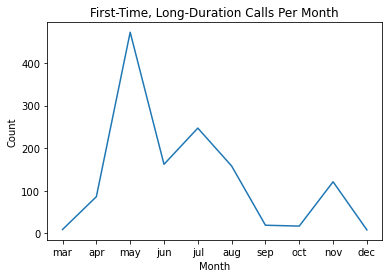

In [15]:

df_control
df_month_counts = df_control.month.value_counts().reset_index()
df_month_counts.columns = ["Month","Count"] 
df_month_counts["month_num"] = [5,7,6,8,11,4,9,10,3,12]
df_month_counts = df_month_counts.sort_values(by="month_num")
sns.lineplot(data=df_month_counts, x="Month", y="Count")
plt.title("First-Time, Long-Duration Calls Per Month");


The low success rate could be due to the high number (peaks) of calls in November, July, and May

In [16]:
percent_diff("education")

,education,ctrl,succ,diff
0,unknown,4.541955,4.693141,0.151185
1,basic.6y,6.543495,4.693141,-1.850354
2,basic.4y,10.469592,10.830325,0.360733
3,professional.course,13.548884,13.718412,0.169528
4,basic.9y,13.779831,11.913357,-1.866473
5,high.school,22.478830,21.660650,-0.818180
6,university.degree,28.637413,32.490975,3.853561


First-time, Long-duration calls to those with a university degree were by far the most successful

In [17]:
percent_diff("loan")

,loan,ctrl,succ,diff
0,unknown,2.463433,1.805054,-0.658379
1,yes,14.472671,15.523466,1.050794
2,no,83.063895,82.671480,-0.392415


Calls to those with a personal loan were signficanty successful. It is possible that those who have a personal loan are more likely to have said yes to a markeing campaign in the past, as personal loans are usually taken out during a marketing call from their bank.

In [18]:
percent_diff("marital")

,marital,ctrl,succ,diff
0,unknown,0.384911,0.361011,-0.023901
1,divorced,11.085450,11.191336,0.105885
2,single,26.866821,31.407942,4.541122
3,married,61.662818,57.039711,-4.623106


Calls to single individuals were 4.54% more succesful and those to marries individauals was %4.62 less successful.

In [19]:

percent_diff("job")

,job,ctrl,succ,diff
0,unknown,0.846805,0.722022,-0.124784
1,student,2.155504,3.249097,1.093593
2,housemaid,2.386451,2.527076,0.140625
3,unemployed,3.156274,3.971119,0.814845
4,entrepreneur,3.310239,2.888087,-0.422152
5,self-employed,3.541186,2.888087,-0.653099
6,retired,4.541955,6.498195,1.956240
7,management,8.237105,6.498195,-1.738911
8,services,9.468822,8.303249,-1.165573
9,technician,16.012317,17.689531,1.677214


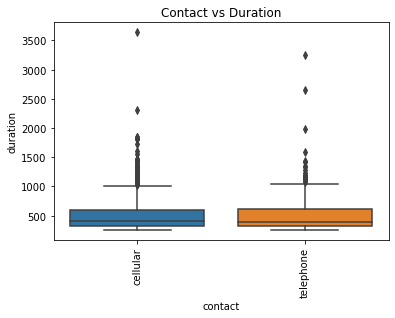

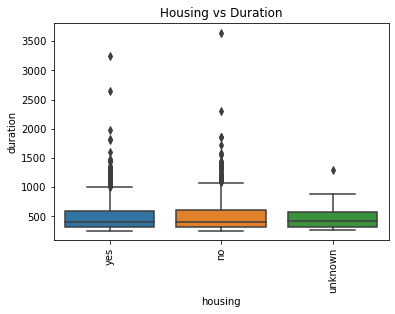

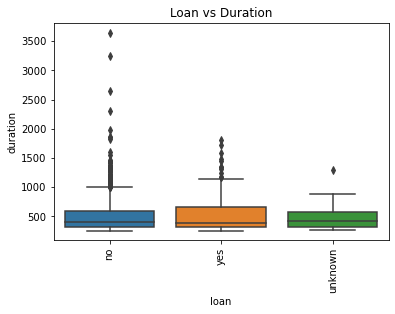

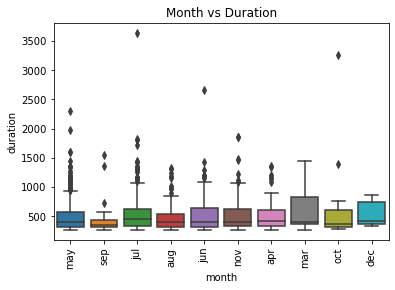

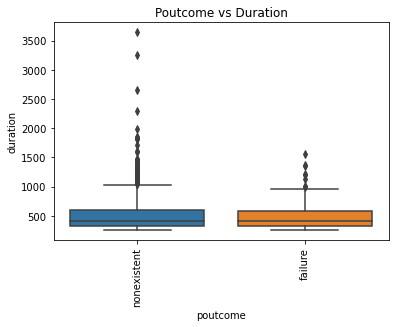

In [20]:

#cat_cols = ["job","marital","education","default","y"]
cat_cols = ["contact","housing","loan","month","poutcome"]


#fig, axes = plt.subplots(2, 2, figsize=(15,15))
#for i,ax in enumerate(axes.ravel()):
for cat in cat_cols:
    #if the duration is greater than 5 minutes,is there a difference
    sns.boxplot( x=cat,y="duration",data=df[mask]);
    plt.title(cat.capitalize()+  " vs Duration")
    plt.xticks(rotation = 90);
    plt.show();
    
    


AttributeError: 'DataFrame' object has no attribute 'balance'

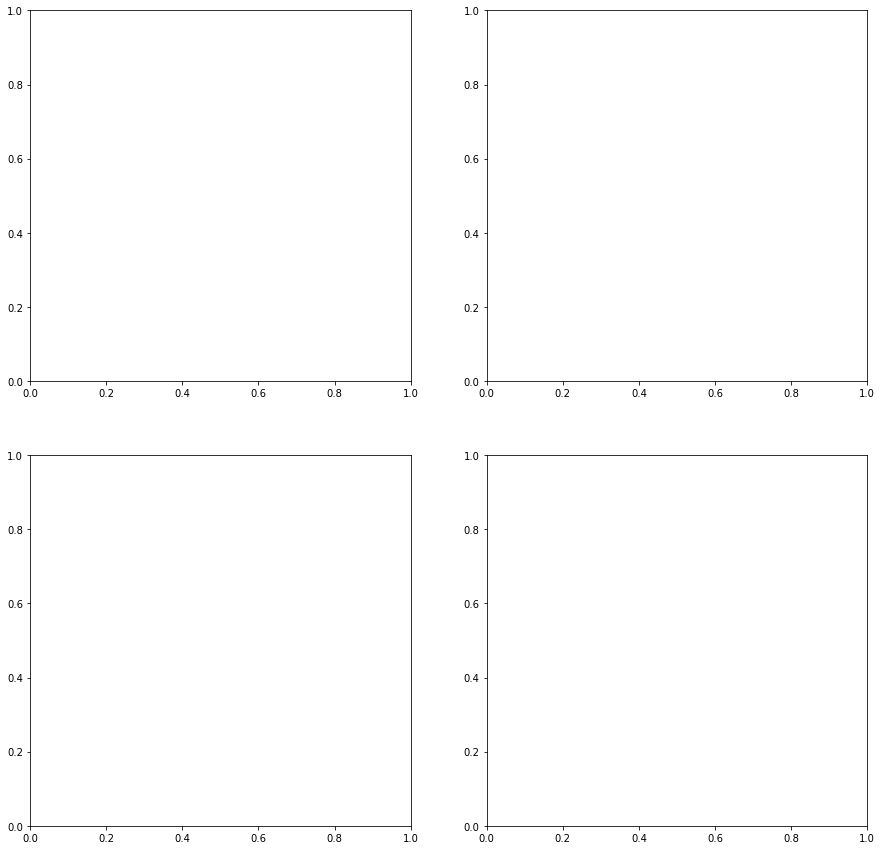

In [21]:

#cat_cols = ["job","marital","education","y"]
cat_cols = ["contact","housing","loan","month","poutcome"]

fig, axes = plt.subplots(2, 2, figsize=(15,15))
for i,ax in enumerate(axes.ravel()):
    sns.boxplot(ax = ax, x=cat_cols[i],y="balance",data=df[df.balance < 10000]);
    plt.xticks(rotation = 90);
    
#Todo: remove outliers form balance
#todo: remove zero days form pdays


In [22]:

df.columns
#df.groupby("campaign").agg({"y":"value_count"})
df_yes = df[["campaign","y"]][df.y == "yes"].value_counts().reset_index()
df_yes.columns = ["campaign","y","yes_count"]
df_total = df[["campaign"]].value_counts().reset_index()
df_total.columns = ["campaign","total_count"]
df_merged = df_yes.merge(df_total, how="inner",on="campaign")


df_merged["percent"] = df_merged.yes_count/df_merged.total_count
successful_camapigns = df_merged[df_merged.total_count > 30].sort_values(by="percent", ascending = False).campaign.to_list()
#total count must be greater thatn 30 as a standard benchmark



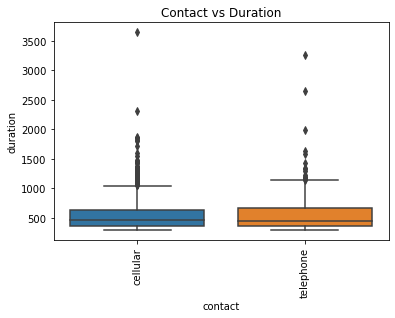

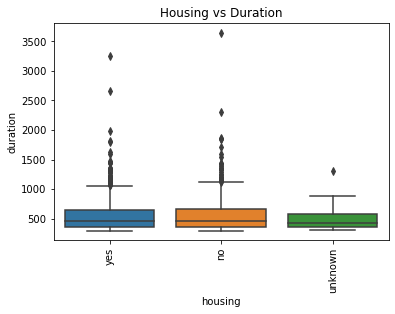

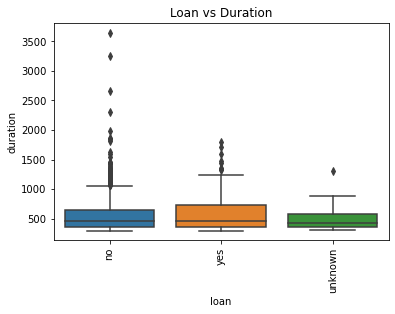

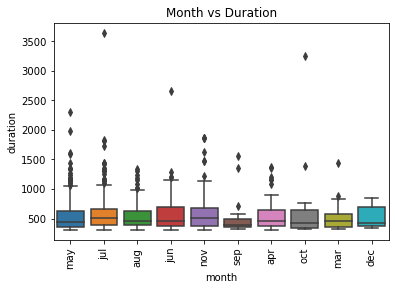

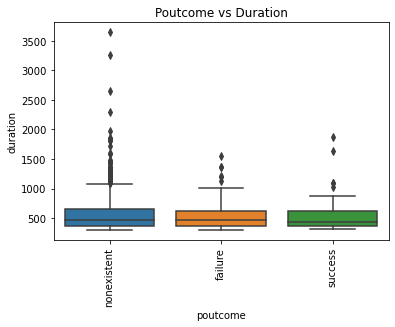

In [23]:
#cat_cols = ["job","marital","education","y"]
cat_cols = ["contact","housing","loan","month","poutcome"]

#fig, axes = plt.subplots(2, 2, figsize=(15,15))
#for i,ax in enumerate(axes.ravel()):
for cat in cat_cols:
    sns.boxplot( x=cat,y="duration",data=df[df.campaign.isin(successful_camapigns) & (df.duration > 300)]);
    plt.title(cat.capitalize()+  " vs Duration")
    plt.xticks(rotation = 90);
    plt.show();
    

In [24]:

#df_success = df_add[df_add.campaign.isin(successful_camapigns) & mask]
df_success = df[(df.y == "yes") & mask]
df_control = df[mask]

cols = ["day_of_week","job","marital","loan","education","month","age_label"]
#ToDo: group by age
for c in cols:

    ctrl = df_control[c].value_counts(normalize=True).sort_values()*100
    succ = df_success[c].value_counts(normalize=True).sort_values()*100
    print()
    print(c)
    display(succ-ctrl)


day_of_week


fri   -0.916284
mon    2.285012
thu   -2.806380
tue   -1.983475
wed    3.421126
Name: day_of_week, dtype: float64


job


admin.           4.289053
blue-collar     -5.867051
entrepreneur    -0.422152
housemaid        0.140625
management      -1.738911
retired          1.956240
self-employed   -0.653099
services        -1.165573
student          1.093593
technician       1.677214
unemployed       0.814845
unknown         -0.124784
Name: job, dtype: float64


marital


unknown    -0.023901
divorced    0.105885
single      4.541122
married    -4.623106
Name: marital, dtype: float64


loan


unknown   -0.658379
yes        1.050794
no        -0.392415
Name: loan, dtype: float64


education


basic.4y               0.360733
basic.6y              -1.850354
basic.9y              -1.866473
high.school           -0.818180
professional.course    0.169528
university.degree      3.853561
unknown                0.151185
Name: education, dtype: float64


month


apr    2.404793
aug    0.111166
dec    1.189196
jul   -0.964085
jun    4.496377
mar    1.473224
may   -9.981852
nov   -1.733630
oct    1.940398
sep    1.064412
Name: month, dtype: float64


age_label


0   -0.791222
1   -1.200868
2   -4.887681
3    1.438207
4    3.708212
5    0.467174
6    1.266178
Name: age_label, dtype: float64

fri    0.110153
thu    0.163811
tue   -0.135440
mon   -0.092514
wed   -0.046010
Name: day_of_week, dtype: float64

In [26]:


df_merged

,campaign,y,yes_count,total_count,percent
0,1,yes,219,1764,0.124150
1,2,yes,119,1039,0.114533
2,3,yes,62,549,0.112933
3,4,yes,32,291,0.109966
4,5,yes,9,142,0.063380
5,6,yes,4,99,0.040404
6,8,yes,2,36,0.055556
7,7,yes,1,60,0.016667
8,9,yes,1,32,0.031250
9,10,yes,1,20,0.050000


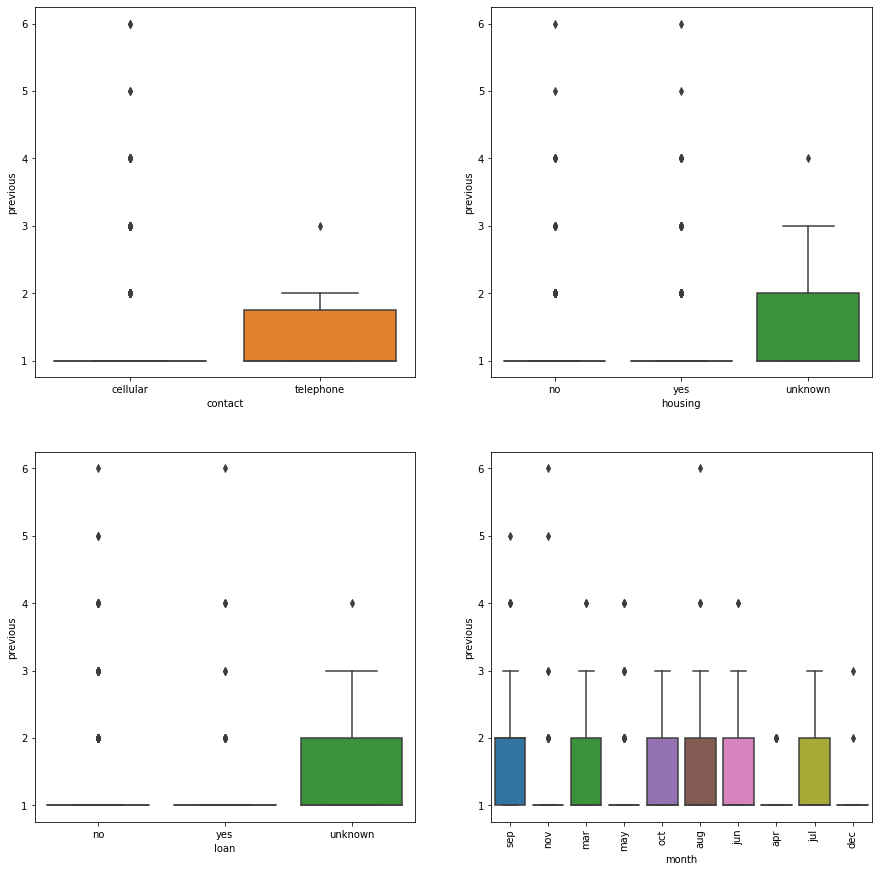

In [25]:




fig, axes = plt.subplots(2, 2, figsize=(15,15))
for i,ax in enumerate(axes.ravel()):
    sns.boxplot(ax = ax, x=cat_cols[i],y="previous",data=df[df.previous > 0]);
    plt.xticks(rotation = 90);

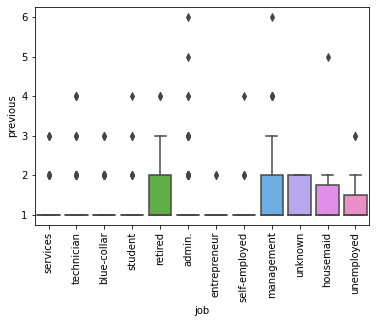

In [27]:
sns.boxplot( x="job",y="previous",data=df[df.previous > 0]);
plt.xticks(rotation = 90);

ValueError: Could not interpret input 'balance'

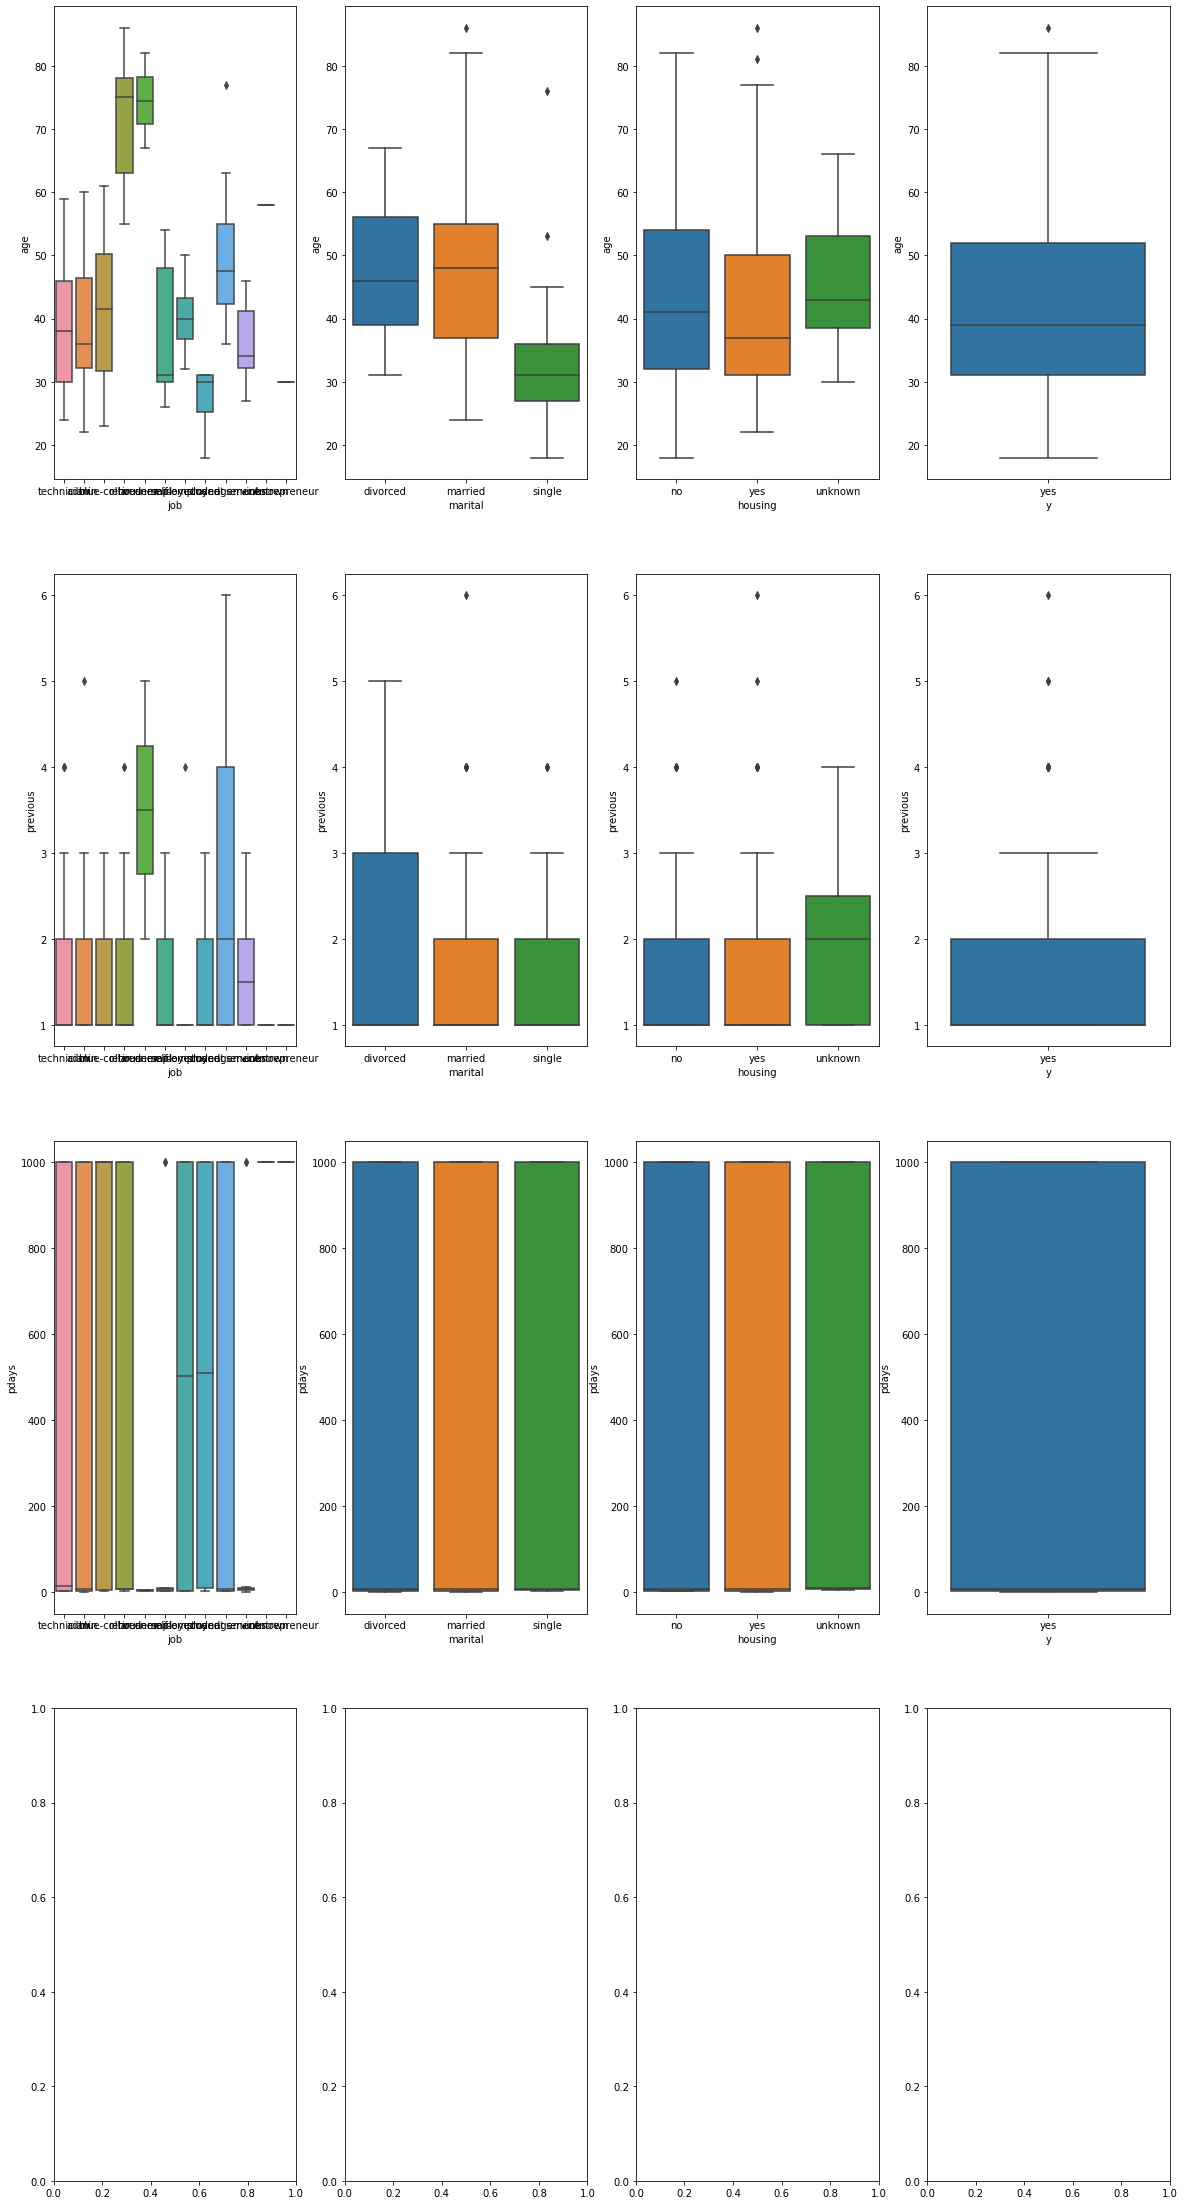

In [28]:

def display_boxplots(df):
    num_cols = ["age","previous","pdays","balance"]
    cat_cols = ["job","marital","housing","y"]
    
    fig, axes = plt.subplots(len(num_cols), len(cat_cols), figsize=(20,40))
    for i,ax in enumerate(axes.ravel()):
        row = i // 4
        col = i % 4
        #print(row,col)
        sns.boxplot(ax=ax, x=cat_cols[col],y=num_cols[row],data=df[df.previous > 0]);
        #plt.xticks(rotation = 90);
display_boxplots(df[df.y == "yes"])    

In [29]:
df_merged["percent"] = df_merged.yes_count/df_merged.total_count
#df[["campaign","y"]].sort_values(by="campaign").value_counts().reset_index()
df_merged

,campaign,y,yes_count,total_count,percent
0,1,yes,219,1764,0.124150
1,2,yes,119,1039,0.114533
2,3,yes,62,549,0.112933
3,4,yes,32,291,0.109966
4,5,yes,9,142,0.063380
5,6,yes,4,99,0.040404
6,8,yes,2,36,0.055556
7,7,yes,1,60,0.016667
8,9,yes,1,32,0.031250
9,10,yes,1,20,0.050000


In [30]:
df_dummy = pd.get_dummies(data=df,columns=["education","housing","loan","job","default","marital"])



In [31]:

len(df.columns)
len(df_dummy.columns)
sel_cols = ["campaign"] + df_dummy.columns[19:].to_list() 
df_dummy2 = df_dummy.groupby("campaign").sum().reset_index()[sel_cols]


In [32]:
df_counts = df_merged.merge( df_dummy2,on="campaign",how="inner")

In [33]:
df_counts.sort_values(by="percent", ascending=False)[df_counts.total_count > 10]
#df_counts.loan_yes/df_counts.total_count
#Todo: why not include campaigns with yes = 0
#Todo: month, day,dayofweek

/var/folders/2n/5k95xl754cb_szsgjkmj33k80000gn/T/ipykernel_35190/2329751700.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_counts.sort_values(by="percent", ascending=False)[df_counts.total_count > 10]


,campaign,y,yes_count,total_count,percent,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,default_no,default_unknown,default_yes,marital_divorced,marital_married,marital_single,marital_unknown
0,1,yes,219,1764,0.124150,396.0,0.0,215.0,544.0,70.0,767.0,40.0,957.0,1439.0,40.0,285.0,437.0,387.0,68.0,47.0,145.0,70.0,59.0,153.0,40.0,289.0,52.0,17.0,1436.0,328.0,0.0,194.0,1074.0,488.0,8.0
1,2,yes,119,1039,0.114533,221.0,0.0,154.0,324.0,39.0,461.0,24.0,554.0,840.0,24.0,175.0,248.0,204.0,42.0,29.0,82.0,42.0,33.0,101.0,26.0,198.0,27.0,7.0,850.0,188.0,1.0,109.0,616.0,313.0,1.0
2,3,yes,62,549,0.112933,131.0,0.0,69.0,149.0,27.0,263.0,22.0,264.0,434.0,22.0,93.0,121.0,136.0,21.0,13.0,39.0,24.0,25.0,58.0,8.0,86.0,11.0,7.0,427.0,122.0,0.0,49.0,353.0,147.0,0.0
3,4,yes,32,291,0.109966,63.0,1.0,39.0,81.0,15.0,136.0,9.0,146.0,238.0,9.0,44.0,70.0,66.0,5.0,8.0,23.0,19.0,19.0,27.0,4.0,39.0,5.0,6.0,228.0,63.0,0.0,35.0,175.0,81.0,0.0
4,5,yes,9,142,0.063380,34.0,0.0,18.0,48.0,2.0,66.0,2.0,74.0,124.0,2.0,16.0,37.0,29.0,6.0,5.0,12.0,3.0,8.0,13.0,2.0,24.0,2.0,1.0,109.0,33.0,0.0,18.0,91.0,33.0,0.0
6,8,yes,2,36,0.055556,6.0,0.0,7.0,12.0,2.0,13.0,0.0,23.0,29.0,0.0,7.0,8.0,8.0,0.0,2.0,3.0,3.0,2.0,2.0,0.0,6.0,2.0,0.0,29.0,7.0,0.0,6.0,15.0,14.0,1.0
10,11,yes,1,19,0.052632,4.0,0.0,3.0,8.0,0.0,10.0,0.0,9.0,16.0,0.0,3.0,8.0,4.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,15.0,4.0,0.0,1.0,10.0,8.0,0.0
9,10,yes,1,20,0.050000,8.0,0.0,1.0,6.0,1.0,6.0,3.0,11.0,15.0,3.0,2.0,9.0,2.0,0.0,0.0,1.0,1.0,3.0,1.0,0.0,1.0,1.0,1.0,15.0,5.0,0.0,3.0,14.0,2.0,1.0
5,6,yes,4,99,0.040404,25.0,0.0,10.0,31.0,3.0,43.0,1.0,55.0,77.0,1.0,21.0,28.0,20.0,1.0,4.0,8.0,2.0,2.0,16.0,1.0,15.0,2.0,0.0,83.0,16.0,0.0,13.0,66.0,20.0,0.0
8,9,yes,1,32,0.031250,6.0,0.0,5.0,12.0,3.0,13.0,0.0,19.0,26.0,0.0,6.0,9.0,5.0,2.0,0.0,1.0,0.0,1.0,5.0,0.0,6.0,3.0,0.0,24.0,8.0,0.0,5.0,21.0,6.0,0.0


<AxesSubplot:ylabel='percent'>

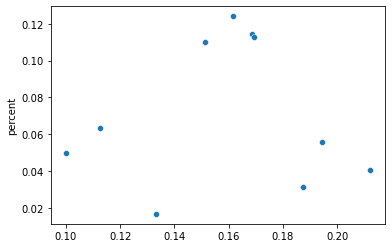

In [34]:
#df_counts.loc[:,df_counts.columns.str.startswith("loan_")]
pct_yes_loan  = df_counts["loan_yes"]/df_counts["total_count"]
#df_counts["percent"] = df_counts["percent"]/100
df_counts["percent"][:10]
sns.scatterplot(x=pct_yes_loan,y=df_counts["percent"][:10],data=df_counts )


In [35]:
select_cols = df_counts.columns[np.array(df_counts.columns.str.startswith("marital_")).tolist()].tolist() + ["percent"]

select_cols
df_counts[select_cols].corr()

#Todo: unemployed correlation 


,marital_divorced,marital_married,marital_single,marital_unknown,percent
marital_divorced,1.000000,0.996737,0.995816,0.864488,0.764782
marital_married,0.996737,1.000000,0.997170,0.843814,0.786303
marital_single,0.995816,0.997170,1.000000,0.828803,0.784919
marital_unknown,0.864488,0.843814,0.828803,1.000000,0.489767
percent,0.764782,0.786303,0.784919,0.489767,1.000000


<AxesSubplot:xlabel='y', ylabel='duration'>

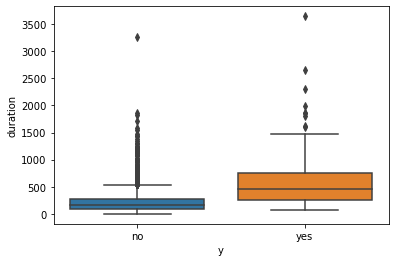

In [36]:
#Todo: Include this graph
sns.boxplot(x="y",y="duration",data=df)

In [37]:
d ={}
d["duration"] = ["max","median","min","count","mean","sum"]
df.groupby("month").agg(d)
#Todo: include


duration                                     
           max median min count        mean     sum
month                                              
apr       1365  219.0   6   215  291.293023   62628
aug       1332  155.0   7   636  218.435535  138925
dec        854  231.5  83    22  324.318182    7135
jul       3643  183.0   5   711  278.015471  197669
jun       2653  171.5   7   530  245.035849  129869
mar       1447  214.0  63    48  274.916667   13196
may       2301  190.0   0  1378  259.260522  357261
nov       1868  175.0   5   446  257.051570  114645
oct       3253  166.0   5    69  271.449275   18730
sep       1551  246.5   5    64  275.812500   17652

(array([1, 2, 3, 4, 5]),
 [Text(1, 0, '(duration, max)'),
  Text(2, 0, '(duration, median)'),
  Text(3, 0, '(duration, min)'),
  Text(4, 0, '(duration, count)'),
  Text(5, 0, '(duration, mean)')])

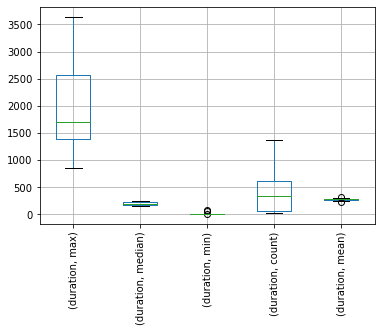

In [38]:
d ={}
d["duration"] = ["max","median","min","count","mean"]
df.groupby("month").agg(d).boxplot()
plt.xticks(rotation = 90)


<AxesSubplot:xlabel='month', ylabel='duration'>

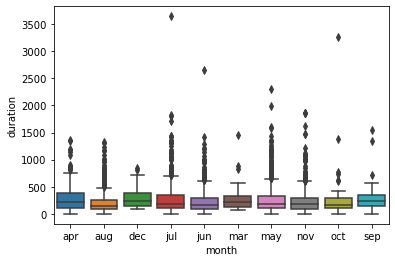

In [39]:
sns.boxplot(x="month", y="duration", data= df.sort_values(by="month"))
#Todo: include

In [40]:
df[df.y=="yes"].groupby(["month","y"])["duration"].sum().reset_index()

,month,y,duration
0,apr,yes,19899
1,aug,yes,30323
2,dec,yes,4272
3,jul,yes,47103
4,jun,yes,36500
5,mar,yes,8849
6,may,yes,64134
7,nov,yes,26835
8,oct,yes,7306
9,sep,yes,7694


In [41]:

day_month = pd.to_datetime(df["month"] + "/"  +df["day"].astype(str) + "/2022" )
df["month"] = day_month.dt.month


KeyError: 'day'

In [42]:
df.month.unique()

array(['may', 'jun', 'nov', 'sep', 'jul', 'aug', 'mar', 'oct', 'apr',
       'dec'], dtype=object)

In [43]:

df_temp = df.sort_values(["campaign","month","day"]).reset_index().reset_index()
cols = df_temp.columns.tolist() #[0] = ["chrono_order"] #,"orig_order"]
cols[:2] = ["chrono_order","orig_order"]
df_temp.columns = cols
df = df_temp
#df["chrono_order"] = np.arange(df.sort_values(["campaign","month","day"]).shape[0])
#reset_index(drop=True)



KeyError: 'day'

In [44]:
#campaigns over time
df.plot(x ="chrono_order",y ="campaign", kind="line")


KeyError: 'chrono_order'

In [45]:
d= {}
d["duration"]  = ["sum","count"]
df_camp = df.groupby(["campaign","month","day"]).agg(d).reset_index()
#df_camp[df_camp["campaign"] == 3]   .plot(x="day",y="duration")

x = []
df_camp.columns = ["campaign","month","day","duration","count"]


KeyError: 'day'

In [46]:
df_camp

NameError: name 'df_camp' is not defined

In [47]:
sns.lineplot(data=df_camp, x="day", y="count",hue="campaign")

NameError: name 'df_camp' is not defined

In [48]:
d= {}
d["duration"]  = ["sum","count"]
df_camp = df.groupby(["campaign","month"]).agg(d).reset_index()
#df_camp[df_camp["campaign"] == 3]   .plot(x="day",y="duration")

x = []

df_camp.columns = ["campaign","month","duration","count"]



In [49]:
df.month.unique()

array(['may', 'jun', 'nov', 'sep', 'jul', 'aug', 'mar', 'oct', 'apr',
       'dec'], dtype=object)

<AxesSubplot:xlabel='month', ylabel='count'>

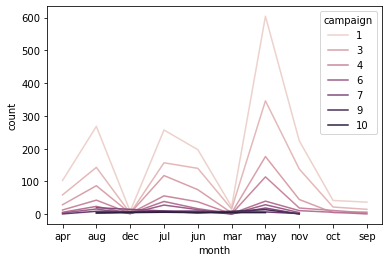

In [50]:
sns.lineplot(data=df_camp[df_camp.campaign < 11], x="month", y="count",hue="campaign")

In [51]:
df  

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_label
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no,1
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,2
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no,2
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,53,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no,1
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,219,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no,2
4116,27,student,single,high.school,no,no,no,cellular,may,mon,64,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no,0
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,528,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no,4


In [52]:

a = {}
a["age"] = ["mean","median"]
a["balance"] = ["mean","median"]
df.groupby("job").agg(a)


KeyError: "Column(s) ['balance'] do not exist"

<AxesSubplot:>

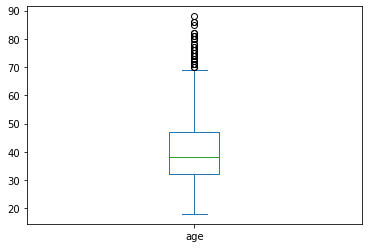

In [53]:

df["age"].sort_values().to_frame().reset_index(drop=True).plot(kind="box")


In [54]:
df["purpose"].value_counts()

KeyError: 'purpose'

In [55]:
df["credit_amount"].plot(kind="box")



KeyError: 'credit_amount'

In [56]:
#EDA
mask = df.y == "yes"
df[mask]["loan"].value_counts(normalize=True)*100


no         82.926829
yes        15.077605
unknown     1.995565
Name: loan, dtype: float64

In [57]:

vc = df[["y","loan","job","marital","education"]].value_counts().to_frame()


In [35]:
import seaborn as sns


<AxesSubplot: xlabel='education', ylabel='age'>

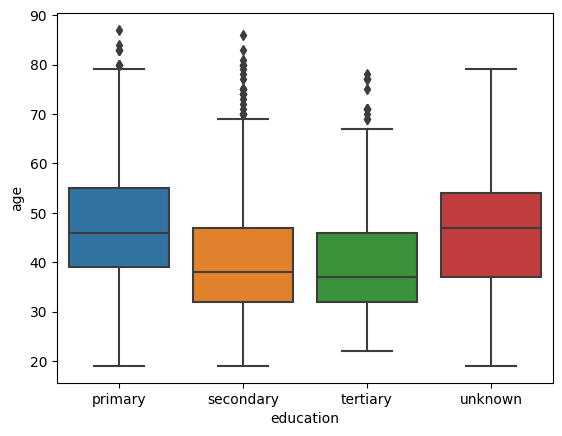

In [37]:

sns.boxplot(x="education",y ="age",data=df)


<AxesSubplot: >

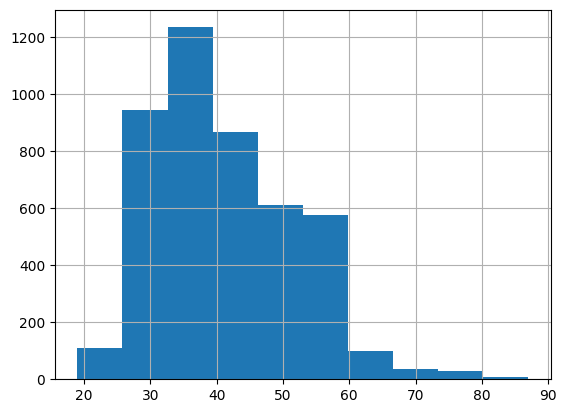

In [38]:
df["age"].hist()